# MSDS 422 Assignment 1


In [312]:
#Import Basic Packages
import numpy as np
import pandas as pd
import math
import os

#Plotting Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model

## Part 0

### Download the Data

In [313]:
housing_train = pd.read_csv("housing_train.csv")
housing_test = pd.read_csv("housing_test.csv")

In [314]:
#Check if data is loaded properly
print(housing_train.head())
print(housing_train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [315]:
print(housing_test.head())
print(housing_test.shape)

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

It looks like the training and test data sets were downloaded correctly. The target variable in this assignment 
is "SalePrice", denoting a property's sale price in USD. We will be using the test data to try and predict this
value, which is why it is not included in the test set. 

### Create Training and Validation Data Sets

In [316]:
#Set random seed so results can be duplicated 
np.random.seed(10)

#Separate target variable from the rest of the variables in the training set
Y = housing_train["SalePrice"]
X = housing_train.drop("SalePrice", axis=1)

In [317]:
#Split data into training and validation sets using sklearn with an 80/20 split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, random_state=10)

In [318]:
#Check data shape to confirm 80/20 split
print(X_train.shape)
print(X_val.shape)

(1168, 80)
(292, 80)


## Part 1

### EDA

We start by getting a feel of the training data. This includes viewing the types of variables, basic descriptive
statistics, and preliminary noting of columns with missing values. This section will also include multiple plots to visualize the independent variables as well as the target variable. 

In [319]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1216 to 1289
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    966 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overa

Column #'s with missing values: 3, 6, 25, 26, 30-33, 35, 42, 57-60, 63, 64, 72-74
This is quite a few columns in the dataset. Some are only missing a few (<50 out of almost 1200) values, 
but others are missing over half. This will be something we have to fix in Part 2 of this notebook. 

#### Response Variable

In [320]:
#Examine the target variable, SalePrice. A good starting point would be viewing its distribution and statistics

#Descriptive Stats
Y_train.describe()

count      1168.00000
mean     181415.76113
std       79299.44807
min       34900.00000
25%      131000.00000
50%      163250.00000
75%      214000.00000
max      755000.00000
Name: SalePrice, dtype: float64

This table indicates the average selling price of a home is about 181,415 and a median value of 163,250. The cheapest house sold for 34,900 and the most expensive for 755,000. All prices are in US dollars.

Text(0, 0.5, 'Frequency')

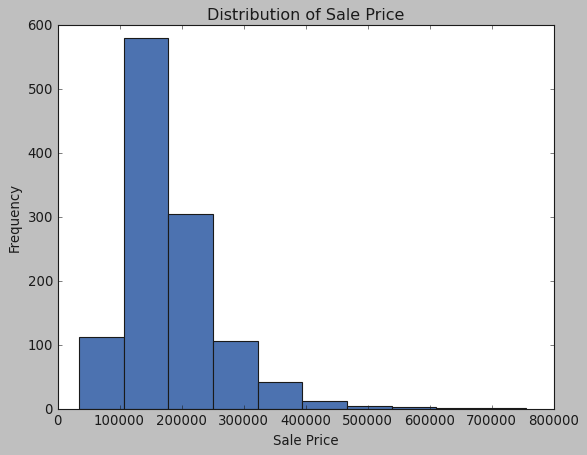

In [321]:
#Distribution
plt.style.use('classic')
plt.hist(Y_train)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")

This histogram of Saleprice indicates that the data is skewed. This will need to be transformed in Part 2 to create a more normal looking distribution. Now that we have a good basis of the response variable, EDA measures will be taken to sift through the factor variables to determine their importance in predicting the sale price of a home.

#### Missing Values

In [322]:
#Examine features with missing values 
X_train.isnull().sum().sort_values(ascending=False).nlargest(20)

PoolQC          1162
MiscFeature     1122
Alley           1098
Fence            945
FireplaceQu      547
LotFrontage      202
GarageCond        62
GarageType        62
GarageYrBlt       62
GarageFinish      62
GarageQual        62
BsmtExposure      30
BsmtCond          30
BsmtQual          30
BsmtFinType1      30
BsmtFinType2      30
MasVnrArea         6
MasVnrType         6
Electrical         1
LotConfig          0
dtype: int64

Some features are missing most of their values. It is probably worth dropping these from the analysis. For features only missing a relative few observations, one option could be to replace the missing values with the median. Further EDA will reveal if these features are important in predicting SalePrice.

#### Incorrect Values

In [323]:
#Are there any numeric variables with negative values
numeric = ['int64', 'float64']
numeric_var = X_train.select_dtypes(include=numeric)
(numeric_var < 0).values.any()

False

In [324]:
#Were any homes sold before they were built
t = X_train["YrSold"] - X_train["YearBuilt"] 
(t < 0).values.any()

False

#### Correlations

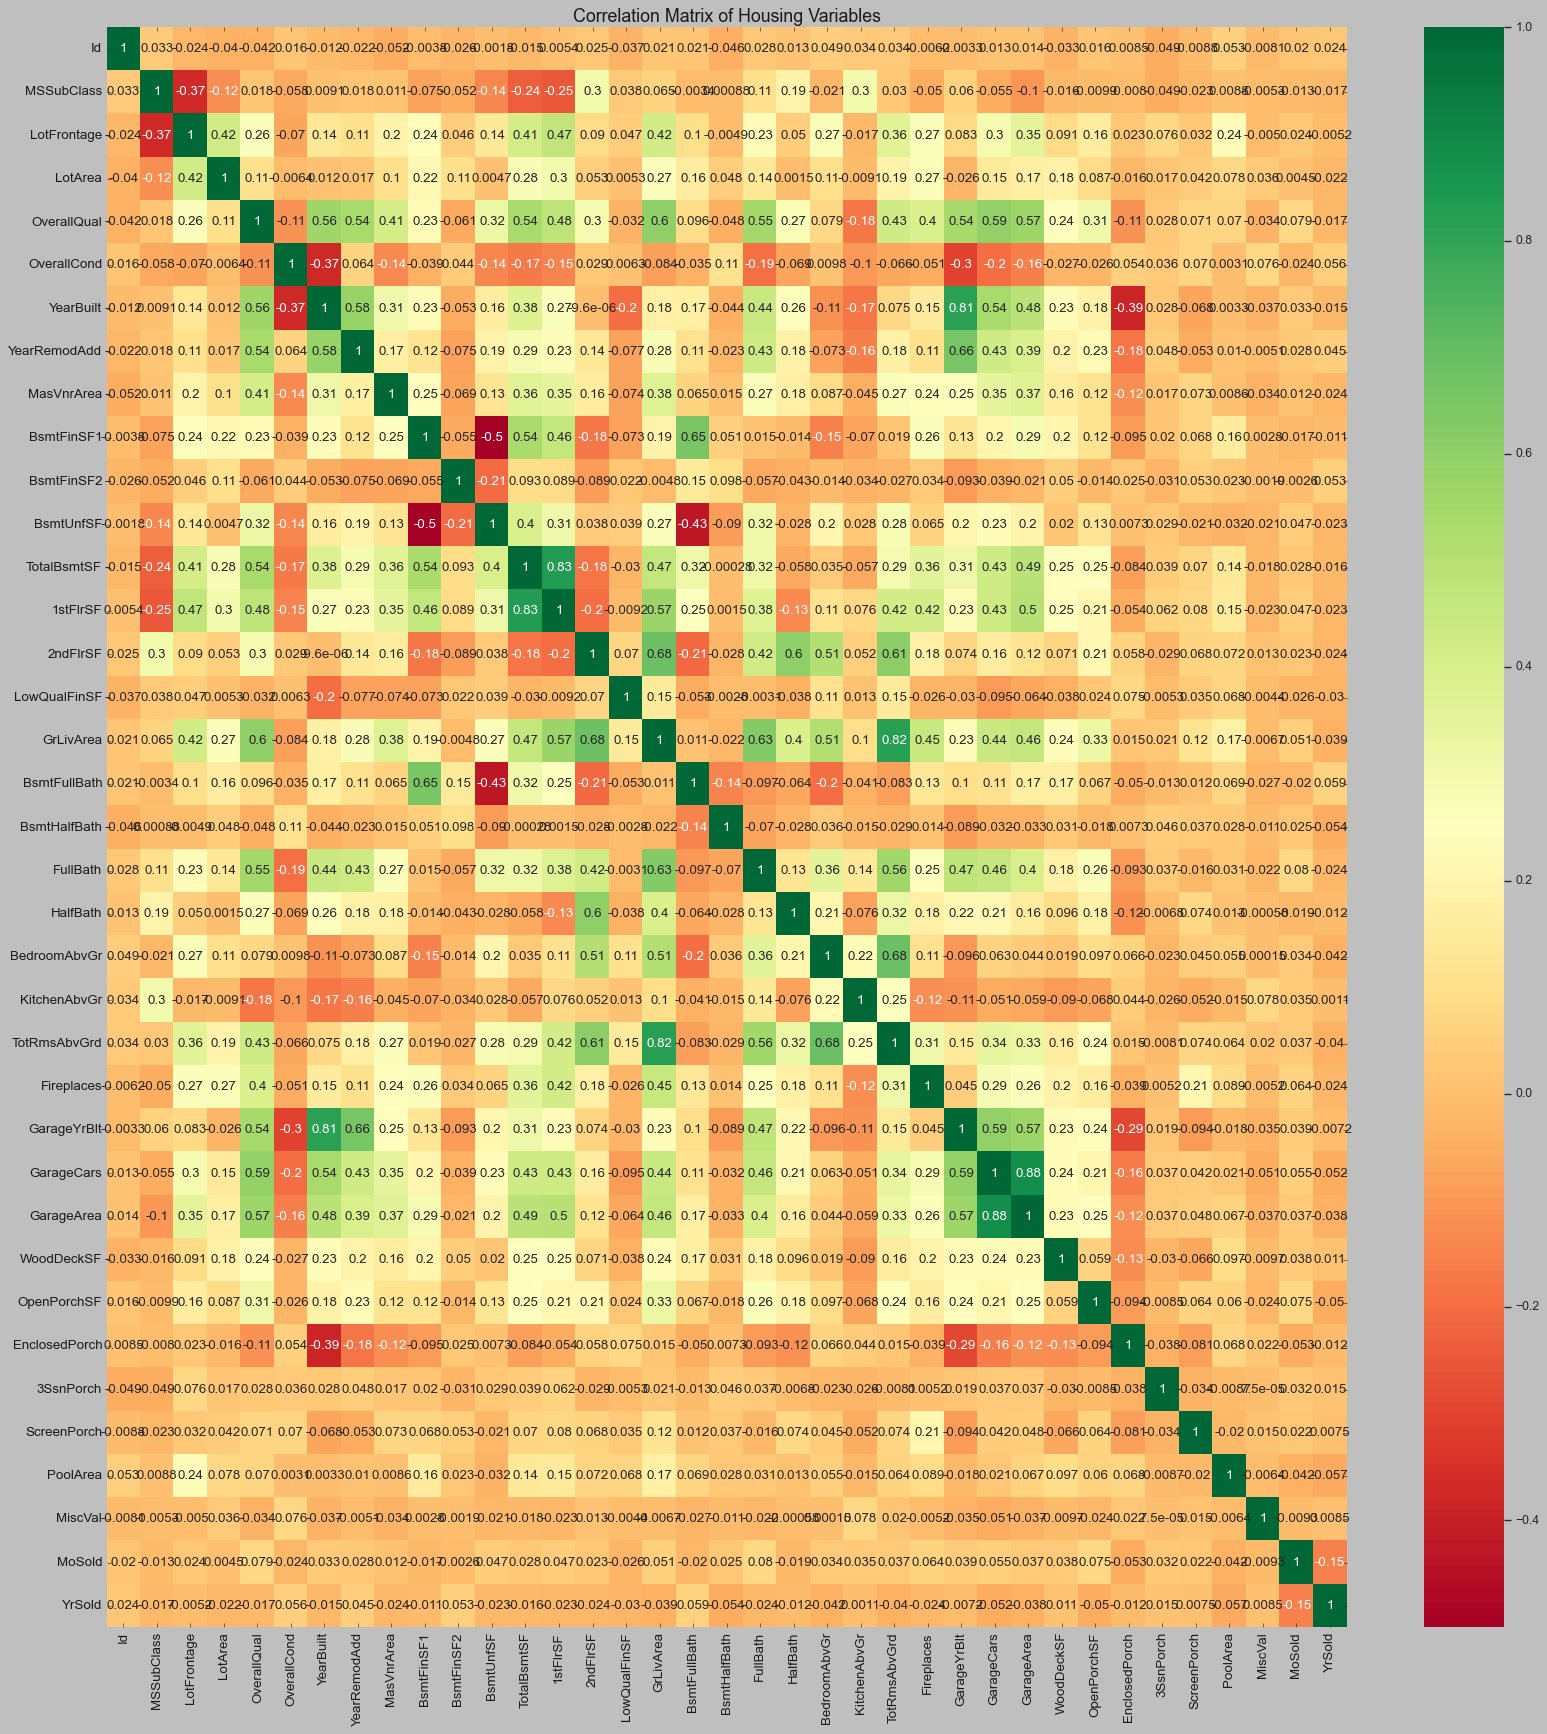

In [325]:
#Generate a correlation plot to view variable interactions
fig, ax = plt.subplots(figsize=(25, 25))

sns.set(font_scale=1)
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn', ax=ax, fmt='.2g')
ax.set_title("Correlation Matrix of Housing Variables", fontsize=16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.show()

The full dataset has a large number of variables so it is difficult to get a clear picture of how the features interact with each other. A general scan shows that the data does not have too much multicollinearity other than variables we would expect to be related (GarageYrBlt and YearBuilt for example). Other examples of variables with high correlation coefficients are measures dealing with size, number of rooms, and additional features such as a basement. Since we are interested in predicting the selling price of a home, it is possible to condense the correlation matrix and view the features with the highest correlation coefficients with respect to SalePrice. 

In [326]:
#Examine correlations with respect to SalePrice
copy = X_train.copy()
copy["SalePrice"] = Y_train.astype(float)
copy.corr()["SalePrice"].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.791758
GrLivArea       0.704181
GarageCars      0.629761
GarageArea      0.618940
TotalBsmtSF     0.604544
1stFlrSF        0.596935
FullBath        0.559072
TotRmsAbvGrd    0.526082
YearBuilt       0.513859
YearRemodAdd    0.502731
GarageYrBlt     0.486752
MasVnrArea      0.462223
Fireplaces      0.453736
BsmtFinSF1      0.359475
LotFrontage     0.355990
WoodDeckSF      0.338862
2ndFlrSF        0.322981
OpenPorchSF     0.310518
HalfBath        0.266554
Name: SalePrice, dtype: float64

A copy of the training set is created, with the addition of SalePrice as a column so we can see which feature variables have the highest correlation in determining the selling price of a house. These are the variables we should give priority to when selecting inputs for out model. A smaller version of the correlation heatmap above is shown below to illustrate the top numeric predictors of SalePrice. 

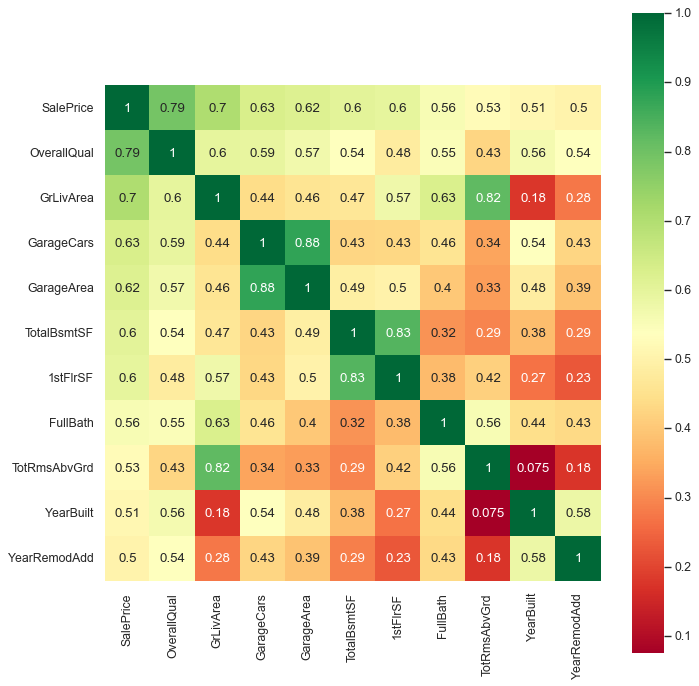

In [327]:
fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = copy.corr()
cols = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(copy[cols].values.T)
sns.heatmap(cm, cbar=True, cmap='RdYlGn', annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

## Part 2

Based on the above EDA, I think it would be ideal to select 12 of the most important features to heavily analyze and use to predict SalePrice. The selected features will be as different as possible to avoid multicollinearity and capture the highest proportion of variance for SalePrice that is explained by the model. 

The selected features are: OverallQual, GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, 1stFlrSF, Neighborhood,  OverallCond, BsmtFinType1, HouseStyle, SaleCondition

Numeric features were generally selected based off their correlation coefficients. Categorical variables were selected based on intuition with respect to the condition of a home when it was sold (location, type, maintanence).  


In [328]:
#Create dataset with selected features for training and validation

features = ["OverallQual", "GrLivArea", "GarageArea", "YearRemodAdd", "FullBath", "YearBuilt", "1stFlrSF",
             "Neighborhood","OverallCond", "BsmtFinType1", "HouseStyle", "SaleCondition"]
Xtrain_reduced = X_train[features]
Xval_reduced = X_val[features]
print(Xtrain_reduced.shape)
print(Xval_reduced.shape)

(1168, 12)
(292, 12)


### Cleaning

In [329]:
#Check reduced training and validation sets for missing values
print(Xtrain_reduced.isna().sum())
print(Xval_reduced.isna().sum())

OverallQual       0
GrLivArea         0
GarageArea        0
YearRemodAdd      0
FullBath          0
YearBuilt         0
1stFlrSF          0
Neighborhood      0
OverallCond       0
BsmtFinType1     30
HouseStyle        0
SaleCondition     0
dtype: int64
OverallQual      0
GrLivArea        0
GarageArea       0
YearRemodAdd     0
FullBath         0
YearBuilt        0
1stFlrSF         0
Neighborhood     0
OverallCond      0
BsmtFinType1     7
HouseStyle       0
SaleCondition    0
dtype: int64


It appears that only one column has missing values, BsmtFinType1. According to the dataset documentation, a value of NA for this categorical variable indicates that there is no basement for that home. To solve this we can simply replace the NA value with another string, "NB", to state there is no basement. 

In [330]:
#Replace NA in BsmtFinType1 with NB for training and validation sets
Xtrain_reduced["BsmtFinType1"].fillna("NB", inplace=True)
Xval_reduced["BsmtFinType1"].fillna("NB", inplace=True)

C:\Users\samee\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Transformations

#### OneHotEncoding Categorical Variables

In [331]:
#Check which of our 12 selected features are categorical
Xtrain_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1216 to 1289
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1168 non-null   int64 
 1   GrLivArea      1168 non-null   int64 
 2   GarageArea     1168 non-null   int64 
 3   YearRemodAdd   1168 non-null   int64 
 4   FullBath       1168 non-null   int64 
 5   YearBuilt      1168 non-null   int64 
 6   1stFlrSF       1168 non-null   int64 
 7   Neighborhood   1168 non-null   object
 8   OverallCond    1168 non-null   int64 
 9   BsmtFinType1   1168 non-null   object
 10  HouseStyle     1168 non-null   object
 11  SaleCondition  1168 non-null   object
dtypes: int64(8), object(4)
memory usage: 118.6+ KB


We have 5 categorical variables labeled as objects. There are also 2 variables which are labeled as int which represent a scale denoted by 1-10 integers: OverallQual and Overall Cond. It is good practice to treat these as categorical variables as well. This gives our reduced dataset an even split of 6 numeric and 6 categorical variables. 

In [366]:
#Separate categorical variables
categorical = ["Neighborhood", "BsmtFinType1", "HouseStyle","SaleCondition","OverallQual","OverallCond"]
XTrain_cat = Xtrain_reduced[categorical]
XVal_cat = Xval_reduced[categorical]

In [367]:
#Use one hot encoder to convert categorical variables into a sparse matrix
ohe = preprocessing.OneHotEncoder(handle_unknown = 'ignore',sparse=False)
ohe.fit(XTrain_cat)
Xtrain_ohe = ohe.transform(XTrain_cat)
Xval_ohe = ohe.transform(XVal_cat)

In [368]:
#List of categories
ohe.categories_

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NB', 'Rec', 'Unf'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        'SFoyer', 'SLvl'], dtype=object),
 array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object),
 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)]

#### Target Variable Transformations

As we saw in part 1, the distribution of SalePrice was skewed: 

Skewness: 1.971717
Kurtosis: 7.280207


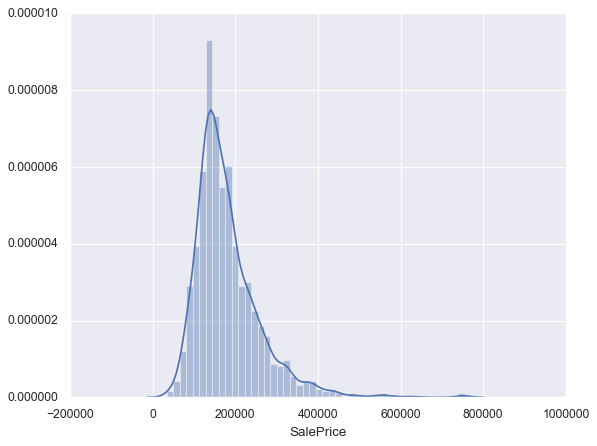

In [337]:
sns.distplot(Y_train)
print("Skewness: %f" % Y_train.skew())
print("Kurtosis: %f" % Y_train.kurt())

Skewness: 0.171368
Kurtosis: 0.787755


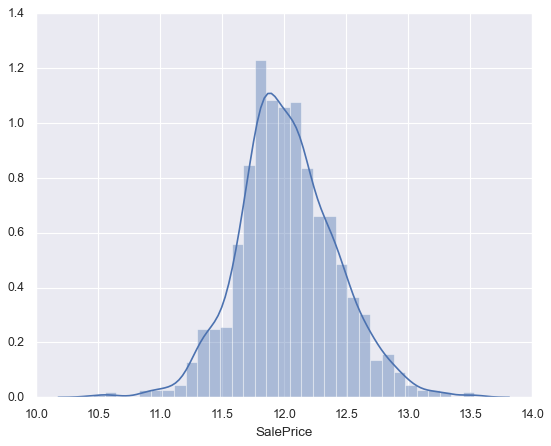

In [338]:
#Log transformation can help give the target variable a normal shape
ytrain_log = np.log(Y_train)
sns.distplot(ytrain_log)
print("Skewness: %f" % ytrain_log.skew())
print("Kurtosis: %f" % ytrain_log.kurt())

This distribution looks much better! Skew and Kurtosis are close to ideal values. 

Skewness: -0.029084
Kurtosis: 0.840463


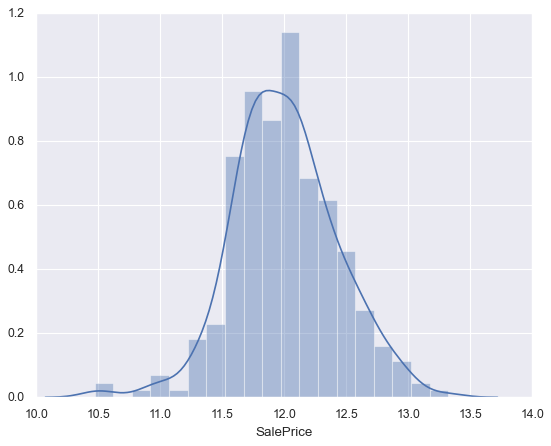

In [339]:
#Perform the same log transformation on the validation set
yval_log = np.log(Y_val)
sns.distplot(yval_log)
print("Skewness: %f" % yval_log.skew())
print("Kurtosis: %f" % yval_log.kurt())

### Rescaling

In [340]:
#Use a standard scaler to standardize numeric variables 
num = ["GrLivArea","GarageArea","YearRemodAdd","FullBath","YearBuilt","1stFlrSF"]
Xtrain_num = Xtrain_reduced[num].to_numpy(copy=True)
Xval_num = Xval_reduced[num].to_numpy(copy=True)

#Standard scaler will result in values with a mean of 0 and a standard deviation of 1
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain_num)
Xtrain_scaled = scaler.fit_transform(Xtrain_num)
Xval_scaled = scaler.fit_transform(Xval_num)

In [341]:
#Verify Mean = 0 and Standard Deviation = 1 
pd.DataFrame(Xtrain_scaled).describe().loc[['mean','std'],]

,0,1,2,3,4,5
mean,1.476178e-16,1.336450e-16,3.678374e-15,-5.332492e-17,-1.641951e-15,-1.066498e-16
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00


### Combine Numeric and Categorical Features

In [342]:
#Check Shape of both arrays
print(Xtrain_scaled.shape)
print(Xtrain_ohe.shape)

(1168, 6)
(1168, 63)


In [343]:
#Combine numeric and categorical arrays into final training and validation sets
Xtrain_final = np.concatenate((Xtrain_scaled,Xtrain_ohe),axis=1)
Xval_final = np.concatenate((Xval_scaled,Xval_ohe),axis=1)
print(Xtrain_final.shape)
print(Xval_final.shape)

(1168, 69)
(292, 69)


## Part 3

In [344]:
#Model Metrics Function from starter code
def modMetrics(modName,predTrain,yTrain,predVal,yVal):
    # returns a dict with metric names as keys, and calculated values as the,
    # well, the values.
    # requires sklearn.preprocessing r2_score, mean_squared_error,
    # mean_absolute_error
    # 
    resDict={'model':modName,   #chr type model name
              'trainR2':r2_score(yTrain,predTrain),
              'valR2':r2_score(yVal,predVal),
              'trainMSE':mean_squared_error(yTrain,predTrain),
              'valMSE':mean_squared_error(yVal,predVal),
              'trainMAE':mean_absolute_error(yTrain,predTrain),
              'valMAE':mean_absolute_error(yVal,predVal)
            }
    return resDict   # returns a dict


### Linear Regression Model

In [345]:
#Build Linear Regression Model and calculate predictions
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(Xtrain_final, ytrain_log)

ltrain_predict = linear_model.predict(Xtrain_final)
lval_predict = linear_model.predict(Xval_final)

In [346]:
Linear_metrics = modMetrics("Linear Regression",ltrain_predict,ytrain_log,lval_predict,yval_log)
print(f'Linear Regression Model Metrics:')
pd.DataFrame(Linear_metrics,index=[0])

Linear Regression Model Metrics:


,model,trainR2,valR2,trainMSE,valMSE,trainMAE,valMAE
0,Linear Regression,0.877972,-9.471163e+18,0.018936,1.668278e+18,0.091812,1.335087e+08


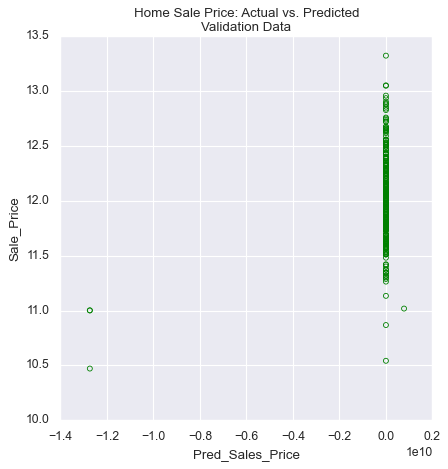

In [347]:
predDF=pd.DataFrame({'Sale_Price':yval_log,'Pred_Sales_Price': lval_predict})
sns.set(rc={"figure.figsize":(6, 6)}) # aspect ratio = 1?

scatter=sns.scatterplot(data=predDF,x='Pred_Sales_Price',
                y='Sale_Price',
                ec='green',fc='none').set(title=
                "Home Sale Price: Actual vs. Predicted\nValidation Data")
plt.show();

### Lasso Regression Model

In [348]:
#Build Lasso Regression Model and calculate predictions
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1, 
              precompute=True,  
              positive=True, 
              selection='random',
              random_state=10)
lasso_model.fit(Xtrain_final, ytrain_log)

lassotrain_predict = lasso_model.predict(Xtrain_final)
lassoval_predict = lasso_model.predict(Xval_final)

In [349]:
lasso_metrics = modMetrics("Lasso Regression",lassotrain_predict,ytrain_log,lassoval_predict,yval_log)
modList=[]
modList.append(Linear_metrics)
modList.append(lasso_metrics)
pd.DataFrame(modList)

,model,trainR2,valR2,trainMSE,valMSE,trainMAE,valMAE
0,Linear Regression,0.877972,-9.471163e+18,0.018936,1.668278e+18,0.091812,1.335087e+08
1,Lasso Regression,0.629623,6.374696e-01,0.057476,6.385715e-02,0.171199,1.835382e-01


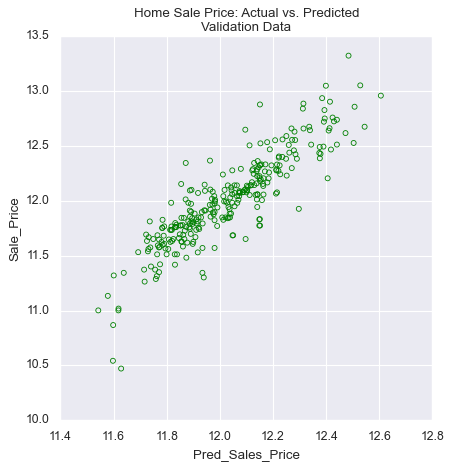

In [350]:
predDF=pd.DataFrame({'Sale_Price':yval_log,'Pred_Sales_Price': lassoval_predict})
sns.set(rc={"figure.figsize":(6, 6)}) # aspect ratio = 1?

scatter=sns.scatterplot(data=predDF,x='Pred_Sales_Price',
                y='Sale_Price',
                ec='green',fc='none').set(title=
                "Home Sale Price: Actual vs. Predicted\nValidation Data")
plt.show();

### ElasticNet Regression Model

In [351]:
from sklearn.linear_model import ElasticNet

E_model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=10)
E_model.fit(Xtrain_final, ytrain_log)

Etrain_predict = E_model.predict(Xtrain_final)
Eval_predict = E_model.predict(Xval_final)

e_metrics = modMetrics("ElasticNet Regression",Etrain_predict,ytrain_log,Eval_predict,yval_log)

In [352]:
modList.append(e_metrics)
pd.DataFrame(modList)

,model,trainR2,valR2,trainMSE,valMSE,trainMAE,valMAE
0,Linear Regression,0.877972,-9.471163e+18,0.018936,1.668278e+18,0.091812,1.335087e+08
1,Lasso Regression,0.629623,6.374696e-01,0.057476,6.385715e-02,0.171199,1.835382e-01
2,ElasticNet Regression,0.652279,6.620138e-01,0.053960,5.953387e-02,0.164602,1.759278e-01


### Ridge Regression Model

In [353]:
from sklearn.linear_model import Ridge

R_model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=10)
R_model.fit(Xtrain_final, ytrain_log)

Rtrain_predict = R_model.predict(Xtrain_final)
Rval_predict = R_model.predict(Xval_final)

r_metrics = modMetrics("Ridge Regression",Rtrain_predict,ytrain_log,Rval_predict,yval_log)

In [354]:
modList.append(r_metrics)
pd.DataFrame(modList)

,model,trainR2,valR2,trainMSE,valMSE,trainMAE,valMAE
0,Linear Regression,0.877972,-9.471163e+18,0.018936,1.668278e+18,0.091812,1.335087e+08
1,Lasso Regression,0.629623,6.374696e-01,0.057476,6.385715e-02,0.171199,1.835382e-01
2,ElasticNet Regression,0.652279,6.620138e-01,0.053960,5.953387e-02,0.164602,1.759278e-01
3,Ridge Regression,0.820782,8.392413e-01,0.027811,2.831650e-02,0.109921,1.202261e-01


In this section, 4 models are built: 
1. Linear Regression
2. Lasso Regression
3. ElasticNet Regression
4. Ridge Regression

The output for training and validation sets are shown above. (Note: I'm not sure why the validation output is so strange for the Linear Regression model. I saw in the Assignment 1 huddle that another student had similar issues, but I detected no nunll values in the transformed data and the columns appeared to be in the correct order). The scaled data seemed to work fine in the validation sets for the other 3 regression models, so I will use them for evaluation purposes. 

On a more positive note, the R-squared for training and validation sets were extremely close for Lasso, ElasticNet, and Ridge models. This implies that the models are not overfitting/underfitting the training data and should generalize well with the test data. It is also good to see low values for MSE (<0.1) and MAE (<0.2) in both training and validation sets. 

Of the three models considered for evaluation, Ridge Regression had a much better R-Squared than Lasso and ElasticNet. Ridge captured about 80% of the variation in SalePrice using our selected predictors in the training and validation data sets; the other two were about 60-65%. Ideally the R-squared would be 90% or above but this is definitely a decent model. Since our predictor variable was log-transformed and numeric values scaled, the MSE values have also been transformed. In order to interpret them in the context of prices in USD, we would have to de-normalize and inverse log transform the MSE value.   

## Part 4

The Ridge Regression model will be used in this part on the test.csv data to generate predictions for kaggle. 

In [355]:
#We need to apply all transformations and scaling that were applied above to the test data

#Reduce the test data to only our predictor variables
features = ["OverallQual", "GrLivArea", "GarageArea", "YearRemodAdd", "FullBath", "YearBuilt", "1stFlrSF",
             "Neighborhood","OverallCond", "BsmtFinType1", "HouseStyle", "SaleCondition"]
Xtest = housing_test[features]
print(Xtest.shape)

(1459, 12)


In [356]:
print(Xtest.isna().sum())

OverallQual       0
GrLivArea         0
GarageArea        1
YearRemodAdd      0
FullBath          0
YearBuilt         0
1stFlrSF          0
Neighborhood      0
OverallCond       0
BsmtFinType1     42
HouseStyle        0
SaleCondition     0
dtype: int64


In [357]:
#There is a missing value for GarageArea, which was not encountered in training or validation
#This most likely indicates the absense of a garage, so we will replace it with a 0

Xtest["BsmtFinType1"].fillna("NB", inplace=True)
Xtest["GarageArea"].fillna(0, inplace=True)

C:\Users\samee\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [369]:
#Encode Categorical Variables
categorical = ["Neighborhood", "BsmtFinType1", "HouseStyle","SaleCondition","OverallQual","OverallCond"]
Xtest_cat = Xtest[categorical]
Xtest_ohe = ohe.transform(Xtest_cat)

#Scale Numeric Variables
Xtest_num = Xtest[num].to_numpy(copy=True)
Xtest_scaled = scaler.fit_transform(Xtest_num)

In [370]:
#Check shape of test arrays
print(Xtest_scaled.shape)
print(Xtest_ohe.shape)

(1459, 6)
(1459, 63)


In [371]:
ohe.categories_

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NB', 'Rec', 'Unf'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        'SFoyer', 'SLvl'], dtype=object),
 array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object),
 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)]

In [372]:
#Combine categorical and numeric predictors
Xtest_final = np.concatenate((Xtest_scaled,Xtest_ohe),axis=1)

In [376]:
#Ridge Regression predictions for the final test data

Ridge_Predictions = R_model.predict(Xtest_final)

#Inverse Log the predictions so they are in USD
Ridge_Predictions = np.expm1(Ridge_Predictions)

#Add ID Column from Test Data
test_ID = housing_test['Id']

#Create DataFrame
R_prediction_data = pd.DataFrame()
R_prediction_data["Id"] = test_ID
R_prediction_data["SalePrice"] = Ridge_Predictions

#Check Values
R_prediction_data.head(10)

,Id,SalePrice
0,1461,132285.340645
1,1462,143664.687840
2,1463,192380.077467
3,1464,201436.156556
4,1465,195961.365538
5,1466,174511.783009
6,1467,182194.989464
7,1468,167882.399873
8,1469,187562.627547
9,1470,124704.047191


In [379]:
#Export Predictions to CSV
R_prediction_data.to_csv("SalePricePredict.csv", index=False)